## Week 12 Assignment - W200 Python Fundamentals for Data Science, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class.

This homework assignment is Week 12 which corresponds to the Unit #11 async. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. (Apologies for the confusion)

## Objectives

- Explore and get insights from a real dataset using pandas
- Practice the use of pandas for: exploratory analysis, information gathering and discovery
- Use matplotlib for plotting charts from the data

## Data files

In this assignment you will apply what you are learning to answer questions about campaign contributions in the Democratic presidential primary race. We will use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You will need to download and save the csv in the same folder as this notebook. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

** REMEMBER -- DO NOT PUT THIS DATA IN YOUR GITHUB REPO ! **

Documentation for this data file can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it contains errors and other pecularities to work through
- The data is ~218mb which will take some time to load (and probably won't load in google sheets or Excel)
- If you make assumptions please annotate them in your answer
- While we've left one code/markdown cell for you after each question as a placeholder, some of your answers will require multiple cells to fully respond
- Double click the markdown cells where it says YOUR ANSWER HERE to enter your written answers; if you need more cells to write answers in please make them markdown cells (rather than code cells)

## Setup

First, run the two cells below. 

The first cell will load in the data to a pandas dataframe named 'contrib'. Note we define a custom date parser to speed up import (we could have Python guess the date format, but this can make the load a lot slower).  

The second cell subsets the data to look at the primary period.  Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.  We will analyze through May 2016.

In [1]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates = ['contb_receipt_dt'], date_parser=d)

# Note - for now, it is okay to ignore the warning about mixed types.  

C:\Users\praba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Subset data to primary period 
print(contrib.shape)

contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(1125659, 18)
(654502, 18)


## 1. Data Exploration

**1a.** First, let's take a preliminary look at our data:
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this dataset (linked above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the "election_tp" variable contain?

In [3]:
# YOUR CODE HERE
print(contrib.shape)
print(contrib.columns)
print(contrib.election_tp.unique())

(654502, 18)
Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')
['P2016' 'G2016' nan 'P2020']


- 1a YOUR ANSWER HERE
1. We do have all the columns in the document in the dataset as well.

2. The 'election_tp' column contains the data in the formaot EYYYY , where E can denote whether it is P for Primary , G for General , O for other , C for convention , R for Runoff ,  S for special and E for recount and the YYYY for the year of the election.

**1b.** Print out the first 5 observations from the dataset to manually look through some of your data.

In [4]:
# YOUR CODE HERE

contrib.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c.** When working with a new dataset, it is important to explore and sanity check your variables. Pick **three** variables from the dataset above and run some quick sanity checks. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use markdown cells to explain if your sanity checks "pass" your scrutiny or if you have concerns about the integrity of your data. 

In [5]:
# YOUR CODE HERE

print('First date of contribution: ',contrib.contb_receipt_dt.min())
print('Last date of the contribution: ', contrib.contb_receipt_dt.max())

print('Maximum contribution amount: ', contrib.contb_receipt_amt.min())
print('Minimum contribution amount: ', contrib.contb_receipt_amt.max())


print('The rows that have Zip is NaN: ', contrib[contrib.contbr_zip.isnull()])

print('Number of NaN in the contribution amount: ', contrib[contrib.contb_receipt_amt.isnull()])


print('Different values count of form_tp columns: ', contrib.form_tp.value_counts())




print('Columns which has NaN values: ', contrib.isnull().sum())


print('Unique candidates Name: ', contrib.cand_nm.unique())
print('Value coune for candidate name: ' , contrib.cand_nm.value_counts())
print('Value count for candidate Id : ', contrib.cand_id.value_counts())

First date of contribution:  2013-11-05 00:00:00
Last date of the contribution:  2016-05-31 00:00:00
Maximum contribution amount:  -10000.0
Minimum contribution amount:  10800.0
The rows that have Zip is NaN:             cmte_id    cand_id                  cand_nm  \
133677   C00575795  P00003392  Clinton, Hillary Rodham   
578967   C00577312  P60007242           Fiorina, Carly   
784300   C00575795  P00003392  Clinton, Hillary Rodham   
1030167  C00575795  P00003392  Clinton, Hillary Rodham   

                            contbr_nm    contbr_city contbr_st contbr_zip  \
133677          DELUCA, MICHAEL FRANK    LOS ANGELES        CA        NaN   
578967                    DURHAM, TIM       HAMILTON        CA        NaN   
784300                  ROWGHANI, ALI  SAN FRANCISCO        CA        NaN   
1030167  COLUMBUS, CHRISTOPHER JOSEPH  SAN FRANCISCO        CA        NaN   

          contbr_employer   contbr_occupation  contb_receipt_amt  \
133677      SELF-EMPLOYED            PRODUCER

- 1c YOUR ANSWER HERE

1. Checked to see the duration of  the contribution by checking the contb_receipt_dt variable max and min methods. The first day of the contribution was 5th November 2013 and the last day of the contribution was 31st May 2016.

2. Similary the maximum contribution (contb_receipt_amt) was $10,800 and the minimum contribution was -$10,000 , that means a refund back to the contributor in this case.

3. Checked to see if the count of individual candidate names matched with the count of candidate ids.

Based on these tests , integrity seems to be ok , except few missing values in the few columns as listed in the script above.




## 2. Exploring Campaign Contributions

Let's investigate the donations to the candidates.

**2a.** 
Create a table that shows the total number of donations to each candidate. Hint: use "groupby" as shown in async unit 11.07.

When presenting data in a table, it is best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to get insights out of your tables. Use "sort_values" to sort the data so that candidates with the largest number of donations appear on top. From now on, all tables you present in this assignment (and course) should be sorted.

What candidate recieved the largest number of contributions (variable 'contb_receipt_amt')?

In [6]:
# YOUR CODE HERE

candidate_group = contrib[contrib.contbr_st=='CA'].groupby('cand_nm')

no_of_donations = candidate_group.cand_id.size().sort_values(ascending=False)

print("Number of donations to each candidate : " ,no_of_donations ,end='\n\n\n')

print("Candidate who recieved the largest number of contributions  : " , candidate_group.contb_receipt_amt.count().sort_values(ascending=False).index[0])



Number of donations to each candidate :  cand_nm
Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: cand_id, dtype: int64


Candidate who recieved the largest number of contribution

- 2a YOUR ANSWER HERE


Candidate who recieved the largest number of contributions  :  Sanders, Bernard


**2b.** Now, create a table that shows the total **value** of donations to each candidate. What candidate raised the most money in California?

In [7]:
# YOUR CODE HERE

amount_of_donation = candidate_group.contb_receipt_amt.sum().sort_values(ascending=False)

print(amount_of_donation,end='\n\n\n')
print("Candidate who received the largest amount of contributions  : " , amount_of_donation.index[0])

cand_nm
Clinton, Hillary Rodham     39,368,777.01
Sanders, Bernard            18,773,871.31
Cruz, Rafael Edward 'Ted'    6,286,460.34
Rubio, Marco                 4,846,483.72
Bush, Jeb                    3,325,536.83
Carson, Benjamin S.          2,952,109.00
Kasich, John R.              1,553,823.54
Fiorina, Carly               1,468,489.42
Trump, Donald J.               893,356.89
Paul, Rand                     797,624.29
Walker, Scott                  495,006.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             408,595.00
O'Malley, Martin Joseph        297,834.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               186,144.50
Webb, James Henry Jr.           76,568.16
Johnson, Gary                   41,187.60
Santorum, Richard J.            36,304.88
Pataki, George E.               30,450.00
Stein, Jill                     27,918.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

- 2b YOUR ANSWER HERE


Candidate who received the largest amount of contributions  :  Clinton, Hillary Rodham



**2c.** Combining your tables
- What is the "type" of the two tables you printed above? Show if they are Series, or DataFrames.
- Convert any Series to pandas DataFrames.
- Update the variable (column) names to accurately describe what is shown
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table. Use the "join" function.

In [8]:
# YOUR CODE HERE

print(type(no_of_donations))
print(type(amount_of_donation))

df_no_of_donations = pd.DataFrame(no_of_donations)
df_amount_of_donation = pd.DataFrame(amount_of_donation)

print(type(df_no_of_donations))
print(type(df_amount_of_donation))
df_no_of_donations.columns = ['No_of_Contributions']
df_amount_of_donation.columns = ['Amount_of_Contributions']

df_no_amount_of_donations = df_no_of_donations.join(df_amount_of_donation)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


**2d.** Calculate and add a new variable to your table that shows the average $ per donation.

In [9]:
# YOUR CODE HERE

df_no_amount_of_donations['Avg_per_Donation'] = df_no_amount_of_donations['Amount_of_Contributions']/df_no_amount_of_donations['No_of_Contributions']

print(df_no_amount_of_donations)

                           No_of_Contributions  Amount_of_Contributions  \
cand_nm                                                                   
Sanders, Bernard                        371795            18,773,871.31   
Clinton, Hillary Rodham                 163509            39,368,777.01   
Cruz, Rafael Edward 'Ted'                57136             6,286,460.34   
Carson, Benjamin S.                      27342             2,952,109.00   
Rubio, Marco                             14089             4,846,483.72   
Fiorina, Carly                            4696             1,468,489.42   
Paul, Rand                                4256               797,624.29   
Bush, Jeb                                 3114             3,325,536.83   
Kasich, John R.                           2988             1,553,823.54   
Trump, Donald J.                          2255               893,356.89   
Walker, Scott                              713               495,006.90   
Huckabee, Mike           

**2e.** There are several interesting conclusions you can draw from the table you have created. Please comment on the results of your data analysis in a short paragraph. What have you learned about campaign contributions in California?

- 2e YOUR ANSWER HERE

Hilary had maximum amount of contributions , Bernard had maximum number of contributions. He also had lowest average contribution per donor.  James had fewest number of contributions but the average contribution was highest for him. State of california had many contributions to democrats than republicans overall both interms of number of contributions and total amount of contributions.



## 3. Exploring Donor Occupation

Above in part 2, we saw that some simple data analysis can give us insights into the campaign of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the "contbr_occupation" variable.

**3a.** Subset your data to create a data frame with only donations for Hillary Clinton. Then use value_counts() and head() to display the top 5 occupations (contbr_occupation) for her donors. Note: we are just interested in the count of donations, not the value of those donations.

In [10]:
clinton_contrib = contrib[contrib.cand_nm == 'Clinton, Hillary Rodham']

print(clinton_contrib.contbr_occupation.value_counts().head())



RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64


- 3a YOUR ANSWER HERE

**3b.** Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.  Specifically, write a function called get_donors() that takes a DataFrame as input, and outputs a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [11]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # YOUR CODE HERE
    return df.contbr_occupation.value_counts().head()

**3c.** Now try running your function on subsets of the dataframe corresponding to three candidates:
    1. Hillary Clinton
    2. Bernie Sanders
    3. Donald Trump

In [12]:
# YOUR CODE HERE
df =  contrib[contrib.cand_nm == 'Clinton, Hillary Rodham']
result = get_donors(df)
print(result)
df =  contrib[contrib.cand_nm == 'Sanders, Bernard']
result = get_donors(df)
print(result)
df =  contrib[contrib.cand_nm == 'Trump, Donald J.']
result = get_donors(df)
print(result)


RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64
NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contbr_occupation, dtype: int64
RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
Name: contbr_occupation, dtype: int64


**3d.** Finally, use a groupby to divide the entire dataset by candidate.  Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.  Look at your output and marvel at what Pandas can do in just one line!

In [13]:
# YOUR CODE HERE
contrib.groupby('cand_nm').apply(get_donors)

cand_nm                                                          
Bush, Jeb                  RETIRED                                     996
                           HOMEMAKER                                   180
                           ATTORNEY                                     92
                           Q.A.                                         89
                           PRESIDENT                                    84
Carson, Benjamin S.        RETIRED                                   13692
                           INFORMATION REQUESTED PER BEST EFFORTS     1614
                           HOMEMAKER                                  1049
                           PHYSICIAN                                   329
                           R.N.                                        234
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your findings in a short paragraph.

- 3e YOUR ANSWER HERE
Almost for every candidate , more number of RETIRED people contributed money to them.  Lots of people who has teaching profession contribute to both democratic candidate Bernard and Hilary. Ben Carson had several physician and R.N contributing to him , it explains that he was also a physician and had a network of health care professionals who contributed to him.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. Do you have any new insights into the results you got in section 2, now that you see the top occupations for each candidate?

- 3f YOUR ANSWER HERE

 Jeb Bush higher average contributions among the top 5 amount of contributions. His contributions came from the people who has the professions such as attorneys and CEOs. Trump didn't rely much on contribution from the donors. HOMEMAKER contributed and surfaced within the top 5 contributors to almost all the candidates. Trump had contributions from CEOs and Presidents than any other candidates.



## 4. Plotting Data

There is an important element that we have not yet explored in this dataset - time.

**4a.** Please create a single line chart with the following elements:
- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

Text(0,0.5,'Amount')

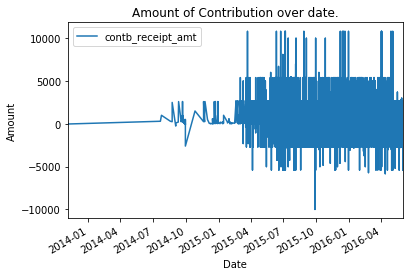

In [31]:
# YOUR CODE HERE


ax = contrib.plot(x='contb_receipt_dt',y='contb_receipt_amt', title='Amount of Contribution over date.')
ax.set_xlabel("Date")
ax.set_ylabel("Amount")



**4b.** This chart is messy (and you should make better plots for your project). While there are better ways we can show this data, what conclusions can you draw from just your basic plot?

- 4b YOUR ANSWER HERE

- Most of the contributions happened between 2015-04 and 2016-04
- Several contribution amounts were around $5000
- Higest contribution amounts were aroud $10,000
- There was one refund around the amount -$10,000
- Majority of the refund amount was around -$2500




**4c.** Brainstorm: If you were going to improve on this plot looking at donations over time, what could you display that would be more useful? You do not need to do any plotting for this question.

- 4c YOUR ANSWER HERE

- It would be interesting to see cumulative contribution amount over time
- We could also plot different candidates contributions over the period of time
- Also interesting to see what week day people contributed the most to least


## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k